In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(832366, 109)



# Total User Actions Taken

In [6]:

# Total user actions taken
if nu.pickle_exists('total_actions_df'):
    total_actions_df = nu.load_object('total_actions_df')
else:
    
    # Define a list of action types we're interested in
    action_types_list = [
        'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
        'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
        'TOOL_DISCARDED'
    ]
    
    # Define a list of command messages we're interested in
    command_messages_list = [
        'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
        'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
    ]
    
    # Create an empty list to store row dictionaries
    rows_list = []
    
    # Iterate over each time group
    for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
    
        # Initialize a dictionary for the current row
        row_dict = {}
    
        # Get the logger version
        logger_version = df1.logger_version.unique().item()
        row_dict['logger_version'] = logger_version
        
        # Assign session_uuid and time_group to the row dictionary
        row_dict['session_uuid'] = session_uuid
        row_dict['time_group'] = time_group
        
        # Create a mask series to filter specific action types and count the total actions
        mask_series = (df1.action_type.isin(action_types_list))
        
        # Include 'VOICE_COMMAND' actions with certain messages in the mask series
        mask_series |= ((df1.action_type == 'VOICE_COMMAND') & (df1.voice_command_message.isin(command_messages_list)))
        
        # Count the total actions that match the mask and assign it to the row dictionary
        row_dict['total_actions'] = df1[mask_series].shape[0]
        
        # Append the row dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of row dictionaries
    total_actions_df = DataFrame(rows_list)
    nu.store_objects(total_actions_df=total_actions_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\total_actions_df.pkl


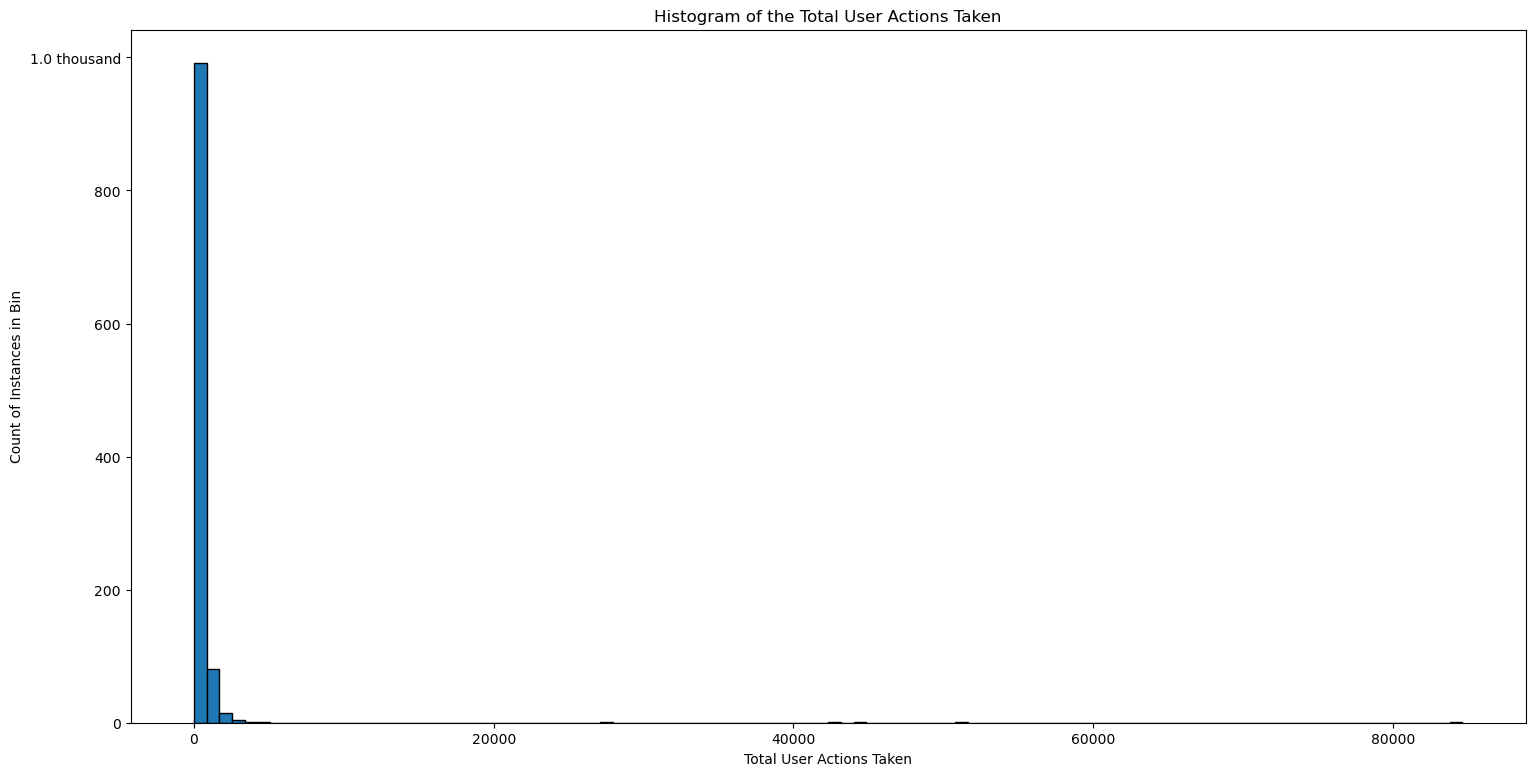

In [8]:

# Display a histogram of the distribution of the number of teleports
xlabel = 'Total User Actions Taken'
get_xtick_text = lambda text_obj: int(text_obj.get_position()[0])
title = 'Histogram of the Total User Actions Taken'
nu.plot_histogram(total_actions_df, 'total_actions', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [7]:

# Define a list of action types we're interested in
action_types_list = [
    'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS', 'TOOL_HOVER',
    'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED', 'BAG_CLOSED', 'TAG_DISCARDED',
    'TOOL_DISCARDED'
]

# Create a boolean mask to filter rows with action types in the list
mask_series = (frvrs_logs_df.action_type.isin(action_types_list))

# Define a list of command messages we're interested in
command_messages_list = [
    'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you', 'can you hear',
    'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
]

# Add to the mask_series to filter rows with specific voice commands
mask_series |= ((frvrs_logs_df.action_type == 'VOICE_COMMAND') & (frvrs_logs_df.voice_command_message.isin(command_messages_list)))

# Take a sample of 4 rows from the filtered dataframe, dropping any columns that are all null, and transpose the dataframe
frvrs_logs_df[mask_series].sample(4).dropna(axis='columns', how='all').T

,672356,796026,214824,772884
action_type,S_A_L_T_WALK_IF_CAN,TOOL_HOVER,PULSE_TAKEN,TOOL_HOVER
elapsed_time,223795,364052,906380,376345
event_time,2022-03-15 09:49:41,2023-06-07 08:43:00,2023-07-27 11:16:01,2023-06-12 14:36:00
session_uuid,9a6d2f32-10fb-40ea-bacc-dd6a7d2f4a13,e072d31f-2592-4c7e-8709-3db1e111240c,401ce554-b556-4a10-88bb-424ed5c22ea8,a0987257-801e-44c5-a1ad-81e0083bfa46
file_name,Disaster Day 2022/ZS_1000.csv,v.1.0/clean-e072d31f-2592-4c7e-8709-3db1e11124...,DCEMS Round 2 only triage sessions/Heather M.csv,v.1.0/clean-a0987257-801e-44c5-a1ad-81e0083bfa...
logger_version,1.3,1.0,1.3,1.0
time_group,2,1,2,1
s_a_l_t_walk_if_can_sort_location,"(3.3, 0.0, 15.2)",NaN,NaN,NaN
s_a_l_t_walk_if_can_sort_command_text,walkIfCan,NaN,NaN,NaN
s_a_l_t_walk_if_can_patient_id,Helga_10 Root,NaN,NaN,NaN


In [6]:

# Show a sort of Total User Actions Taken
total_actions_df.sort_values(
    ['total_actions'], ascending=[True]
)

,logger_version,session_uuid,time_group,total_actions
0,1.0,04882754-51a0-4e5b-9617-b200e3609116,0,0
137,1.0,5dce5abe-7ded-46e7-8d07-b2e2cd76ef55,0,0
140,1.0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,0,0
143,1.0,60d42fe6-f30b-4eab-ba01-644dde714e4d,0,0
146,1.3,666ce61c-2ebc-40ee-902e-6f6aa42801ad,0,0
...,...,...,...,...
173,1.0,724fdf45-3165-43b8-b9ca-dc07102d2886,11,1799
365,1.3,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,1,1864
236,1.0,8f6097ce-795d-483a-a811-e6a5423bc59d,1,2257
264,1.0,a0987257-801e-44c5-a1ad-81e0083bfa46,3,2773


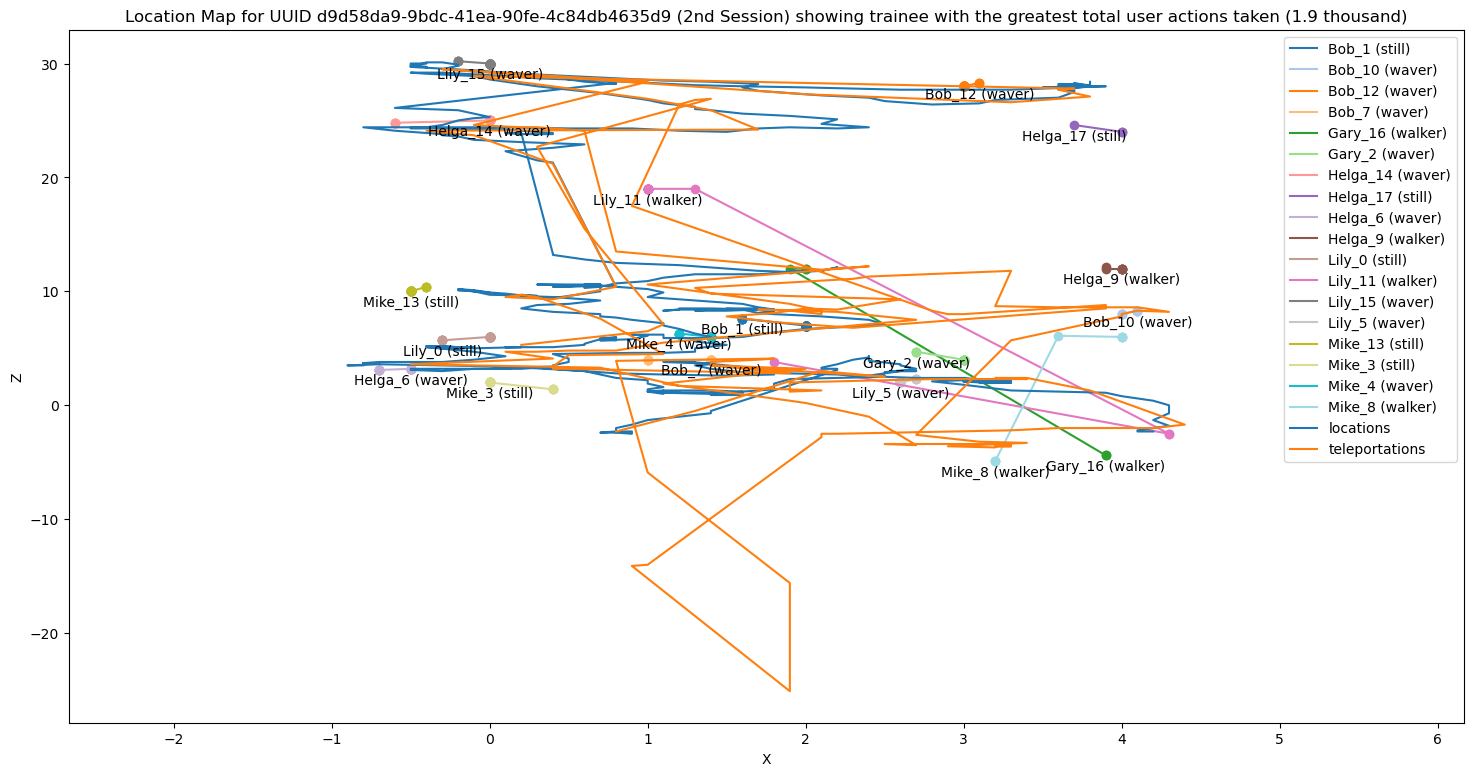

In [7]:

# Get time group with the greatest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

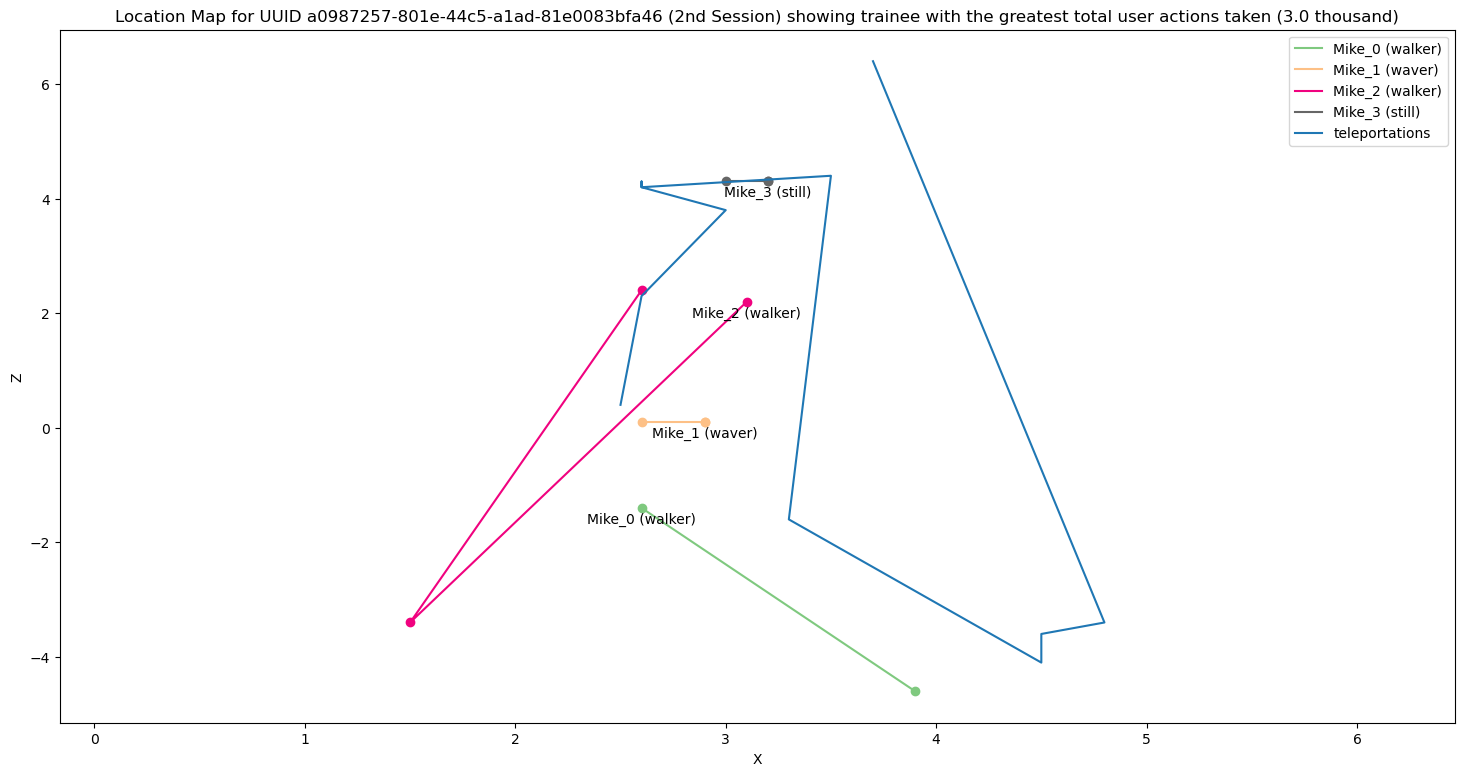

In [8]:

# Get time group with the greatest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=False, humanize_type='intword',
    title_str='greatest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

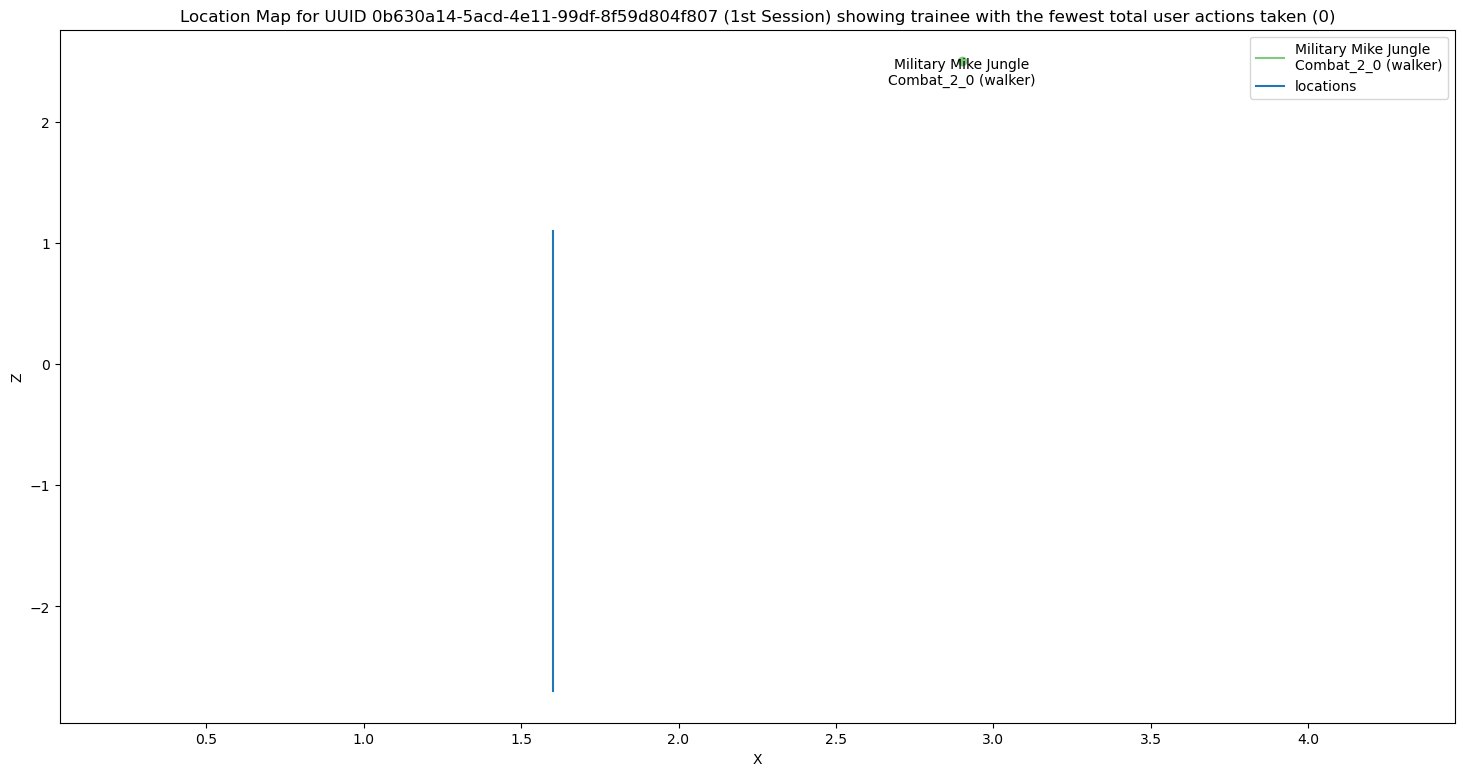

In [9]:

# Get time group with the fewest total user actions taken, v1.3
mask_series = (total_actions_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)

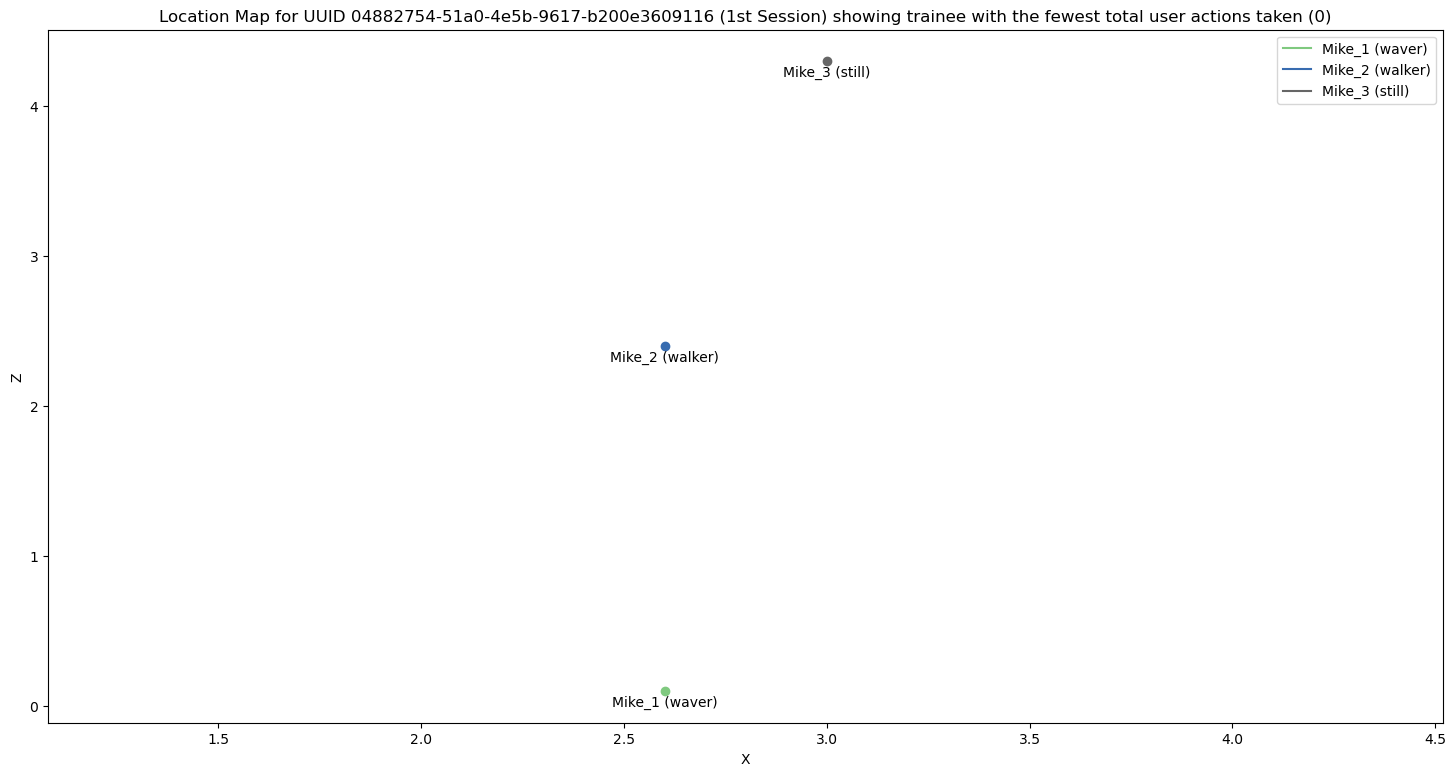

In [10]:

# Get time group with the fewest total user actions taken, v1.0
mask_series = (total_actions_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    total_actions_df, 'total_actions', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='fewest total user actions taken', frvrs_logs_df=frvrs_logs_df, verbose=False
)